/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:17:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


✅ Accuracy: 0.888

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.99      0.94      1344
           1       0.07      0.01      0.01       156

    accuracy                           0.89      1500
   macro avg       0.48      0.50      0.48      1500
weighted avg       0.81      0.89      0.84      1500



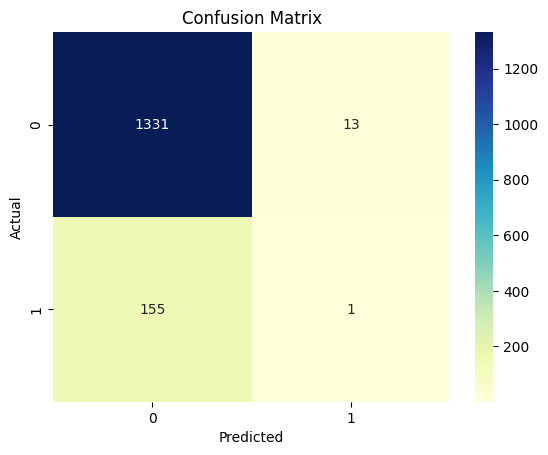

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

# Step 1: Generate Synthetic Dataset
np.random.seed(42)
n = 5000  # Number of transactions

data = {
    'amount': np.random.exponential(scale=200, size=n).round(2),
    'location': np.random.choice(['US', 'UK', 'IN', 'CA', 'FR', 'DE'], size=n),
    'device': np.random.choice(['Mobile', 'Desktop', 'Tablet'], size=n),
    'is_foreign_transaction': np.random.choice([0, 1], size=n, p=[0.9, 0.1]),
    'is_high_risk_country': np.random.choice([0, 1], size=n, p=[0.95, 0.05]),
    'used_vpn': np.random.choice([0, 1], size=n, p=[0.97, 0.03]),
    'failed_logins': np.random.randint(0, 4, size=n),
    'account_age_days': np.random.randint(10, 3000, size=n),
    'transaction_hour': np.random.randint(0, 24, size=n),
    'is_fraud': np.random.choice([0, 1], size=n, p=[0.9, 0.1])  # 10% fraud
}

df = pd.DataFrame(data)

# Step 2: Encode Categorical Features
le = LabelEncoder()
df['location'] = le.fit_transform(df['location'])
df['device'] = le.fit_transform(df['device'])

# Step 3: Split into features and target
X = df.drop('is_fraud', axis=1)
y = df['is_fraud']

# Step 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Step 5: Train High-Accuracy Model (XGBoost)
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(X_train, y_train)

# Step 6: Predictions
y_pred = model.predict(X_test)

# Step 7: Evaluation
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))

# Step 8: Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='YlGnBu')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
